<a href="https://colab.research.google.com/github/jiseon0516/pdm19/blob/main/py-pandas/pandas_3_harnessing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [62]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20210927', periods=6)
dates

DatetimeIndex(['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02'],
              dtype='datetime64[ns]', freq='D')

In [63]:
# dataframe
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-09-27,0.471435,-1.190976,1.432707,-0.312652
2021-09-28,-0.720589,0.887163,0.859588,-0.636524
2021-09-29,0.015696,-2.242685,1.150036,0.991946
2021-09-30,0.953324,-2.021255,-0.334077,0.002118
2021-10-01,0.405453,0.289092,1.321158,-1.546906
2021-10-02,-0.202646,-0.655969,0.193421,0.553439


### 데이터 재구성(setting) 또는 확장

In [64]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210927', periods=6))
s1

2021-09-27    1
2021-09-28    2
2021-09-29    3
2021-09-30    4
2021-10-01    5
2021-10-02    6
Freq: D, dtype: int64

In [65]:
df['F'] = s1 # F열 추가

In [66]:
df  # 기존 df의 구조에 맞춰서 확장, 재구성됨.

,A,B,C,D,F
2021-09-27,0.471435,-1.190976,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


#### Setting data by label & its index

> **at, iat**

- at : label을 이용하여 값 지정
- iat: index를 이용하여 값 지정

In [67]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [68]:
# Setting values by label:
df.at[dates[0],'A'] = 0 #dates[0]: 첫 날, 하루 (Timestamp)
df

,A,B,C,D,F
2021-09-27,0.000000,-1.190976,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [69]:
# Setting values by position (index):
df.iat[0,1] = 0 #인덱스 이용, 0행 1열의 값 0(특정값)으로 재지정
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,-0.312652,1
2021-09-28,-0.720589,0.887163,0.859588,-0.636524,2
2021-09-29,0.015696,-2.242685,1.150036,0.991946,3
2021-09-30,0.953324,-2.021255,-0.334077,0.002118,4
2021-10-01,0.405453,0.289092,1.321158,-1.546906,5
2021-10-02,-0.202646,-0.655969,0.193421,0.553439,6


In [70]:
# Important properties of DataFrame
len(df), df.shape, df.size 
#len(df): 행의 수, df.shape: numpy 배열의 shape-행열 튜플로, df.size: 데이터프레임의 모든 요소의 개수

(6, (6, 5), 30)

In [71]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df)) #5를 가진 리스트를 행의 수만큼 'D'열에 넣기, len(df)=6
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,5,1
2021-09-28,-0.720589,0.887163,0.859588,5,2
2021-09-29,0.015696,-2.242685,1.150036,5,3
2021-09-30,0.953324,-2.021255,-0.334077,5,4
2021-10-01,0.405453,0.289092,1.321158,5,5
2021-10-02,-0.202646,-0.655969,0.193421,5,6


### Missing data 처리[중요]
> pandas primarily uses the value **np.nan** to represent missing data. 
- dropna()
- fillna()
- isna()

In [72]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,5,1
2021-09-28,-0.720589,0.887163,0.859588,5,2
2021-09-29,0.015696,-2.242685,1.150036,5,3
2021-09-30,0.953324,-2.021255,-0.334077,5,4
2021-10-01,0.405453,0.289092,1.321158,5,5
2021-10-02,-0.202646,-0.655969,0.193421,5,6


In [73]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [74]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) #열만 지정, 값 지정 x - 비워진 게 아니라 NaN 지정
#dates[0:4]: 4일동안(27,28,29,30)
df1

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,5,1,NaN
2021-09-28,-0.720589,0.887163,0.859588,5,2,NaN
2021-09-29,0.015696,-2.242685,1.150036,5,3,NaN
2021-09-30,0.953324,-2.021255,-0.334077,5,4,NaN


In [75]:
df1.loc[dates[0]:dates[1],'E'] = 1 #E열에 0,1행에 값 지정
df1

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,5,1,1.0
2021-09-28,-0.720589,0.887163,0.859588,5,2,1.0
2021-09-29,0.015696,-2.242685,1.150036,5,3,NaN
2021-09-30,0.953324,-2.021255,-0.334077,5,4,NaN


In [76]:
df1.info() #E열 2개가 문제 있다는 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-09-27 to 2021-09-30
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       4 non-null      float64
 3   D       4 non-null      int64  
 4   F       4 non-null      int64  
 5   E       2 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 384.0 bytes


### Check 0 or NaN in dataframe
- df.isnull().sum()
- df.isna().sum()

In [77]:
df1.isnull().sum() #null인 경우 확인

A    0
B    0
C    0
D    0
F    0
E    2
dtype: int64

In [78]:
df1.isna().sum() #null인 경우 확인

A    0
B    0
C    0
D    0
F    0
E    2
dtype: int64

In [79]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,5,1
2021-09-28,-0.720589,0.887163,0.859588,5,2
2021-09-29,0.015696,-2.242685,1.150036,5,3
2021-09-30,0.953324,-2.021255,-0.334077,5,4
2021-10-01,0.405453,0.289092,1.321158,5,5
2021-10-02,-0.202646,-0.655969,0.193421,5,6


In [80]:
df.isnull().sum()

A    0
B    0
C    0
D    0
F    0
dtype: int64

## Drop missing data from DataFrame

In [81]:
# To drop any rows that have missing data.
df1.dropna(how='any') #dropna: NaN이 있는 행 다 삭제

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,5,1,1.0
2021-09-28,-0.720589,0.887163,0.859588,5,2,1.0


In [82]:
# Filling missing data.
df1.fillna(value=5) #fillna: NaN을 삭제하지 않고 살아있는 값의 평균값으로 대체하는 방법

,A,B,C,D,F,E
2021-09-27,0.000000,0.000000,1.432707,5,1,1.0
2021-09-28,-0.720589,0.887163,0.859588,5,2,1.0
2021-09-29,0.015696,-2.242685,1.150036,5,3,5.0
2021-09-30,0.953324,-2.021255,-0.334077,5,4,5.0


In [83]:
# Get the boolean mask where values are nan.
pd.isna(df1) #isna: NaN이 있는 항목만 True로 나옴

,A,B,C,D,F,E
2021-09-27,False,False,False,False,False,False
2021-09-28,False,False,False,False,False,False
2021-09-29,False,False,False,False,False,True
2021-09-30,False,False,False,False,False,True




---



### 데이터 통계 (Statistics)

In [84]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,5,1
2021-09-28,-0.720589,0.887163,0.859588,5,2
2021-09-29,0.015696,-2.242685,1.150036,5,3
2021-09-30,0.953324,-2.021255,-0.334077,5,4
2021-10-01,0.405453,0.289092,1.321158,5,5
2021-10-02,-0.202646,-0.655969,0.193421,5,6


In [85]:
df.mean() #열의 평균값

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [86]:
df.mean(0) #axis=0: 열의 평균값

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [87]:
df.mean(1) #axis=1: 행의 평균값

2021-09-27    1.486541
2021-09-28    1.605233
2021-09-29    1.384609
2021-09-30    1.519598
2021-10-01    2.403141
2021-10-02    2.066961
Freq: D, dtype: float64

In [88]:
#열의 표준편차
df.std(0) #, df.std(1)

A    0.565658
B    1.271236
C    0.699548
D    0.000000
F    1.870829
dtype: float64

In [89]:
#행의 표준편차
df.std(1)

2021-09-27    2.061772
2021-09-28    2.130806
2021-09-29    2.773389
2021-09-30    2.939388
2021-10-01    2.404059
2021-10-02    3.168088
Freq: D, dtype: float64

In [90]:
#깔끔하게 출력
print(df.std(0))
print(df.std(1))

A    0.565658
B    1.271236
C    0.699548
D    0.000000
F    1.870829
dtype: float64
2021-09-27    2.061772
2021-09-28    2.130806
2021-09-29    2.773389
2021-09-30    2.939388
2021-10-01    2.404059
2021-10-02    3.168088
Freq: D, dtype: float64


#### [DIY: 도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프 - 시각화
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D,E 

In [91]:
import numpy as np
import matplotlib.pyplot as plt
# 노트북 셀 내에 그림 출력 (Jupyter notebook or lab)
# %matplotlib inline

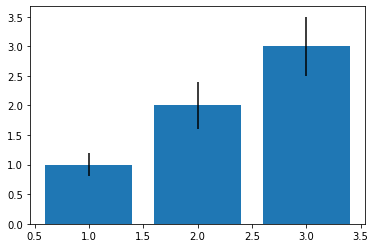

In [92]:
# 막대그래프(bar graph)를 그린다.
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
# x_pos = list(range(len(bar_labels))) #len(bar_labels): 3개 => x_pos=0,1,2 위치

#x_pos = list(range(len(bar_labels))+1)
#TypeError: unsupported operand type(s) for +: 'range' and 'int'

x_pos = list(range(1,len(bar_labels)+1)) #x_pos= 1,2,3 위치
plt.bar(x_pos, means, yerr=stddevs) #yerr=stddevs: 표준편차

plt.show()

In [93]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,5,1
2021-09-28,-0.720589,0.887163,0.859588,5,2
2021-09-29,0.015696,-2.242685,1.150036,5,3
2021-09-30,0.953324,-2.021255,-0.334077,5,4
2021-10-01,0.405453,0.289092,1.321158,5,5
2021-10-02,-0.202646,-0.655969,0.193421,5,6


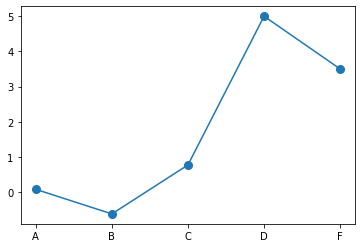

In [94]:
plt.plot(df.mean(0), '-o', ms=8) #열별 평균값

<BarContainer object of 5 artists>

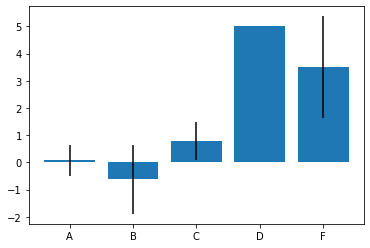

In [98]:
# df의 평균(mean(0))과 표준편차를 이용한 막대그래프(bar)
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0)) #, color='rgbcy')

In [102]:
df

,A,B,C,D,F
2021-09-27,0.000000,0.000000,1.432707,5,1
2021-09-28,-0.720589,0.887163,0.859588,5,2
2021-09-29,0.015696,-2.242685,1.150036,5,3
2021-09-30,0.953324,-2.021255,-0.334077,5,4
2021-10-01,0.405453,0.289092,1.321158,5,5
2021-10-02,-0.202646,-0.655969,0.193421,5,6


AttributeError: ignored

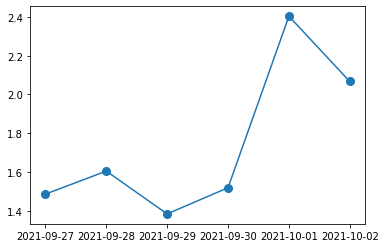

In [107]:
# [DIY] df의 날짜별 평균(mean(1))과 표준편차를 이용한 막대그래프
# Your code
plt.plot(df.mean(1), '-o', ms=8)
bar_labels = df.row
plt.bar(bar_labels,df.mean(1), yerr=df.std(1)) #, color='rgbcy')


---